In [123]:
%load_ext autoreload
%autoreload 2
import nibabel as nib
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob

import sys
sys.path.append('../src')
from helper import *

In [6]:
!pwd

/mnt/e/HCP_MEG_fMRI/test


In [8]:
!ls ../data/100307/MNINonLinear/Results/rfMRI_REST1_LR

100307_rfMRI_REST1_LR_ICA_Classification_dualscreen.scene
100307_rfMRI_REST1_LR_ICA_Classification_singlescreen.scene
Atlas_hp_preclean.dtseries.nii
Movement_AbsoluteRMS.txt
Movement_AbsoluteRMS_mean.txt
Movement_Regressors.txt
Movement_Regressors_dt.txt
Movement_RelativeRMS.txt
Movement_RelativeRMS_mean.txt
PhaseOne_gdc_dc.nii.gz
PhaseTwo_gdc_dc.nii.gz
ReclassifyAsNoise.txt
ReclassifyAsSignal.txt
RestingStateStats
RibbonVolumeToSurfaceMapping
SBRef_dc.nii.gz
brainmask_fs.2.nii.gz
rfMRI_REST1_LR.L.native.func.gii
rfMRI_REST1_LR.R.native.func.gii
rfMRI_REST1_LR.nii.gz
rfMRI_REST1_LR_Atlas.dtseries.nii
rfMRI_REST1_LR_Atlas_MSMAll.dtseries.nii
rfMRI_REST1_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii
rfMRI_REST1_LR_Atlas_hp2000_clean.dtseries.nii
rfMRI_REST1_LR_Atlas_hp2000_clean_bias.dscalar.nii
rfMRI_REST1_LR_Atlas_hp2000_clean_vn.dscalar.nii
rfMRI_REST1_LR_Atlas_stats.dscalar.nii
rfMRI_REST1_LR_Atlas_stats.txt
rfMRI_REST1_LR_CSF.txt
rfMRI_REST1_LR_Jacobian.nii.gz
rfMRI_REST1_LR_Physio_log.

In [14]:
!ls ../data/100307/MNINonLinear/fsaverage_LR32k

100307.32k_fs_LR.wb.spec
100307.ArealDistortion_FS.32k_fs_LR.dscalar.nii
100307.ArealDistortion_MSMAll.32k_fs_LR.dscalar.nii
100307.ArealDistortion_MSMSulc.32k_fs_LR.dscalar.nii
100307.BA.32k_fs_LR.dlabel.nii
100307.BiasField_MSMAll.32k_fs_LR.dscalar.nii
100307.EdgeDistortion_MSMAll.32k_fs_LR.dscalar.nii
100307.L.ArealDistortion_FS.32k_fs_LR.shape.gii
100307.L.ArealDistortion_MSMSulc.32k_fs_LR.shape.gii
100307.L.BA.32k_fs_LR.label.gii
100307.L.MyelinMap.32k_fs_LR.func.gii
100307.L.MyelinMap_BC.32k_fs_LR.func.gii
100307.L.SmoothedMyelinMap.32k_fs_LR.func.gii
100307.L.SmoothedMyelinMap_BC.32k_fs_LR.func.gii
100307.L.aparc.32k_fs_LR.label.gii
100307.L.aparc.a2009s.32k_fs_LR.label.gii
100307.L.atlasroi.32k_fs_LR.shape.gii
100307.L.corrThickness.32k_fs_LR.shape.gii
100307.L.curvature.32k_fs_LR.shape.gii
100307.L.flat.32k_fs_LR.surf.gii
100307.L.inflated.32k_fs_LR.surf.gii
100307.L.inflated_MSMAll.32k_fs_LR.surf.gii
100307.L.midthickness.32k_fs_LR.surf.gii
100307.L.midthickness_MSMAll.32k_fs

In [4]:
!ls ../output/parcellate

100307_rfMRI_REST1_LR.ptseries.nii  214524_rfMRI_REST2_RL.ptseries.nii
100307_rfMRI_REST1_RL.ptseries.nii  221319_rfMRI_REST1_LR.ptseries.nii
100307_rfMRI_REST2_LR.ptseries.nii  221319_rfMRI_REST1_RL.ptseries.nii
100307_rfMRI_REST2_RL.ptseries.nii  221319_rfMRI_REST2_LR.ptseries.nii
102816_rfMRI_REST1_LR.ptseries.nii  221319_rfMRI_REST2_RL.ptseries.nii
102816_rfMRI_REST1_RL.ptseries.nii  223929_rfMRI_REST1_LR.ptseries.nii
102816_rfMRI_REST2_LR.ptseries.nii  223929_rfMRI_REST1_RL.ptseries.nii
102816_rfMRI_REST2_RL.ptseries.nii  223929_rfMRI_REST2_LR.ptseries.nii
105923_rfMRI_REST1_LR.ptseries.nii  223929_rfMRI_REST2_RL.ptseries.nii
105923_rfMRI_REST1_RL.ptseries.nii  233326_rfMRI_REST1_LR.ptseries.nii
105923_rfMRI_REST2_LR.ptseries.nii  233326_rfMRI_REST1_RL.ptseries.nii
105923_rfMRI_REST2_RL.ptseries.nii  233326_rfMRI_REST2_LR.ptseries.nii
106521_rfMRI_REST1_LR.ptseries.nii  233326_rfMRI_REST2_RL.ptseries.nii
106521_rfMRI_REST1_RL.ptseries.nii  248339_rfMRI_REST1_LR.ptseries.nii
106521

In [106]:
paths = glob('../output/parcellate/100307*')

In [107]:
paths

['../output/parcellate/100307_rfMRI_REST1_LR.ptseries.nii',
 '../output/parcellate/100307_rfMRI_REST1_RL.ptseries.nii',
 '../output/parcellate/100307_rfMRI_REST2_LR.ptseries.nii',
 '../output/parcellate/100307_rfMRI_REST2_RL.ptseries.nii']

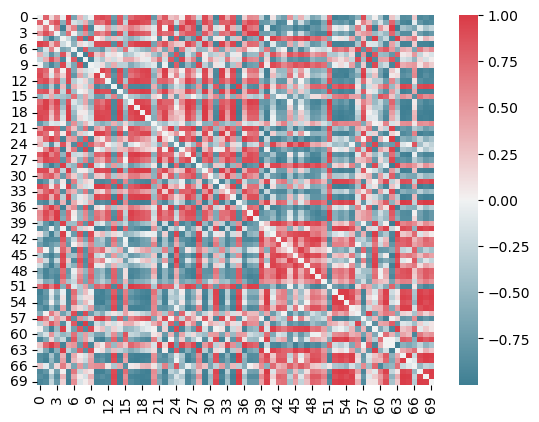

In [145]:
paths = glob('../output/parcellate/100307*')
data = []
for path in paths:
    par = nib.load(path)
    par_dat = par.get_fdata()
    
    par_mean = np.mean(par_dat, axis=1)
    par_mean = par_mean[:, np.newaxis]
    par_std = np.std(par_dat, axis=1)
    par_std = par_std[:, np.newaxis]
    
    par_dat = (par_dat-par_mean)/par_std
    
    data.append(par_dat[::50,:])

data = np.vstack(data).T
# remove rows having all zeroes
data = data[~np.all(data == 0, axis=1)]
df = pd.DataFrame(data.T)
corr = df.corr().values
np.fill_diagonal(corr, 0)
plot_corr(corr, close=False)

<AxesSubplot:>

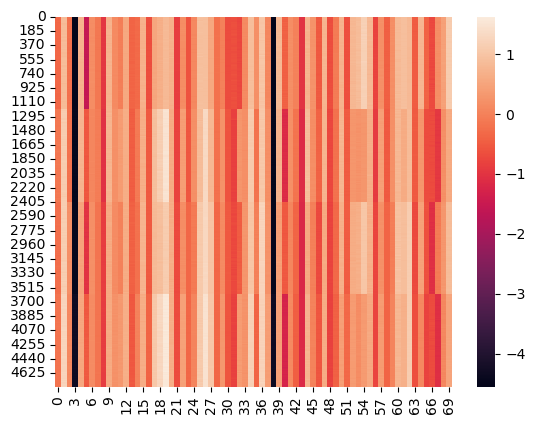

In [136]:
sns.heatmap(df)

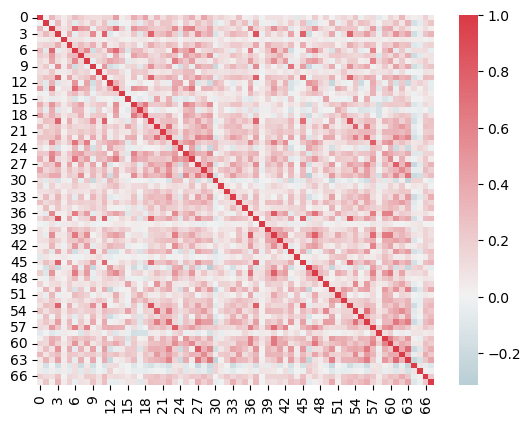

In [130]:
paths = glob('../output/parcellate/212823*')
data = []
for path in paths:
    par = nib.load(data_path)
    par_dat = par.get_fdata()
    data.append(par_dat)

data = np.vstack(data).T
# remove rows having all zeroes
data = data[~np.all(data == 0, axis=1)]
resample = data[:, ::50]
df = pd.DataFrame(data.T)
plot_corr(df.corr(), close=False)

In [94]:
data_path = "../output/parcellate/100307_rfMRI_REST2_RL.ptseries.nii"
par = nib.load(data_path)
par_dat = par.get_fdata()
df = pd.DataFrame(par_dat[:, :])

<AxesSubplot:ylabel='Count'>

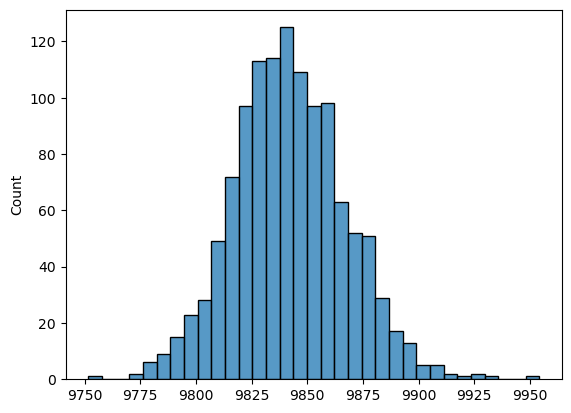

In [119]:
sns.histplot(par_dat.T[0,:])

In [99]:
par_dat = par.get_fdata()
df = pd.DataFrame(par_dat[:, :])

In [100]:
df.shape

(1200, 70)

<AxesSubplot:>

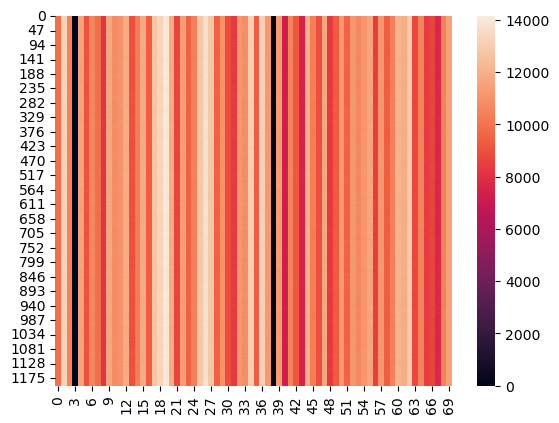

In [104]:
sns.heatmap(df)

In [101]:
corr = df.corr().dropna(axis=1, how='all').dropna(axis=0, how='all')

<AxesSubplot:>

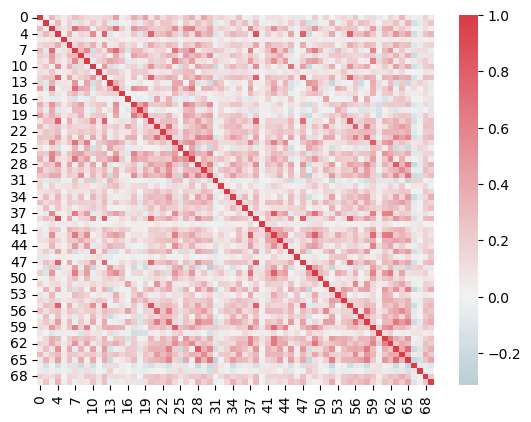

In [102]:
sns.heatmap(corr, annot=False,center=0, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [19]:
data_path          = "../data/100307/MNINonLinear/Results/rfMRI_REST1_LR/rfMRI_REST1_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii"
parcellation_path  = "../data/100307/MNINonLinear/fsaverage_LR32k/100307.aparc.32k_fs_LR.dlabel.nii"
output_path        = "../output/test.ptseries.nii"

In [20]:
test_data = nib.load(output_path)

In [28]:
test_data.get_fdata().shape

(1200, 70)

In [16]:
parcellation = nib.load(parcellation_path)

In [17]:
parcellation.shape

(1, 59412)

In [21]:
parcellation_data = parcellation.get_fdata()

In [23]:
parcellation_data

memmap([[10., 29., 24., ..., 50., 50., 50.]])